In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv("final_dataset.csv")
dataset['labels'].loc[dataset['labels'] == 0] = -1 

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [3]:
dataset

,created_at,entry_id,Ambient Temp (degC),Humidity (%),Soil Moisture (%),Capacitor Voltage (mV),Soil Temperature (degC),SACP Cell Current (mA),Soil Voltage (V),Cell Power (mW),year,month,day,labels
0,2020-06-18 23:29:49,1,20.6875,47.49635,99,2907.74194,22.5000,25.9,0.2946,8,2020,6,18,1
1,2020-06-18 23:30:58,2,20.6250,47.52944,99,2909.03223,22.5000,26.0,0.2946,8,2020,6,18,1
2,2020-06-18 23:32:06,3,20.6250,47.55913,99,2909.03223,22.5000,26.0,0.2946,8,2020,6,18,1
3,2020-06-18 23:33:15,4,20.5625,47.59531,99,2912.90332,22.5000,26.0,0.2946,8,2020,6,18,1
4,2020-06-18 23:34:23,5,20.4375,47.60892,99,2911.61279,22.4375,26.0,0.2946,8,2020,6,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375198,2021-07-26 19:11:20,380357,26.1250,88.10663,100,2925.48389,24.9375,16.4,1.6400,0,2021,7,26,-1
375199,2021-07-26 19:12:30,380358,26.0625,88.35374,100,2874.19360,24.9375,16.4,1.6400,0,2021,7,26,-1
375200,2021-07-26 19:13:40,380359,26.0625,88.63950,100,2889.67749,24.9375,16.4,1.6400,0,2021,7,26,-1
375201,2021-07-26 19:14:49,380360,25.9375,88.89094,100,3067.41943,24.8750,16.3,1.6300,0,2021,7,26,-1


In [4]:
df1 = dataset.iloc[:, [2,3,5,6,7,8]]
minmax = MinMaxScaler()
X_train = minmax.fit_transform(df1)
true_labels = np.array(dataset.iloc[:, 13])

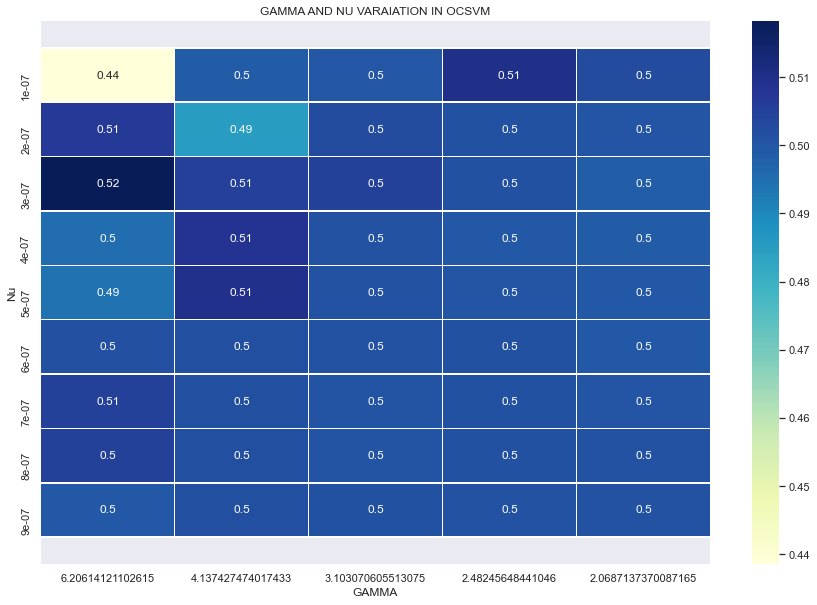

In [5]:
nu_value = [1e-08, 2e-08, 3e-08, 4e-08, 5e-08, 6e-08, 7e-08, 8e-08, 9e-08]
gamma_val = [4.0/(X_train.var()), 2.0/(X_train.var()),1.0/(X_train.var()),1.0/(2*X_train.var()), 1.0/(3*X_train.var()), 1.0/(4*X_train.var()), 1.0/(5*X_train.var()), 1.0/(6*X_train.var())]

acc = []
f1 = []
prec = []
rec = []
for i in nu_value:
    for j in gamma_val:
        model = OneClassSVM(nu = i, gamma = j)
        model.fit(X_train)
        ocsvm_labels = model.predict(X_train)
        acc.append(accuracy_score(true_labels, ocsvm_labels))
        f1.append(f1_score(true_labels, ocsvm_labels))
        prec.append(precision_score(true_labels, ocsvm_labels))
        rec.append(recall_score(true_labels, ocsvm_labels))

acc = np.array(acc)
f1 = np.array(f1)
acc = acc.reshape(len(nu_value), len(gamma_val))
f1 = f1.reshape(len(nu_value), len(gamma_val))
df = pd.DataFrame(acc, index = nu_value, columns = gamma_val)

plt.figure(figsize=(15,10))
sns.heatmap(df, annot = True, linewidth = 0.5, cmap = "YlGnBu")
plt.xlabel("GAMMA")
plt.ylabel("Nu")
plt.title("GAMMA AND NU VARAIATION IN OCSVM")


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [6]:
acc

array([[0.43853327, 0.49895123, 0.50003598, 0.50999059, 0.50255195],
       [0.50682164, 0.48546254, 0.50260526, 0.50133661, 0.50039579],
       [0.51828477, 0.50545705, 0.50496931, 0.50133661, 0.49855412],
       [0.49536651, 0.50851672, 0.50093416, 0.49973214, 0.4989539 ],
       [0.49430042, 0.50963079, 0.50093416, 0.50033182, 0.49974814],
       [0.50163245, 0.50203223, 0.50100612, 0.50118203, 0.49974814],
       [0.50500662, 0.50206688, 0.500617  , 0.50118203, 0.50028918],
       [0.50490001, 0.50178703, 0.500617  , 0.50130463, 0.5010994 ],
       [0.49987607, 0.50178703, 0.50143256, 0.50112872, 0.5010994 ]])